In [8]:
# Python 3.8.12  

import pandas as pd
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 

In [9]:
rocket_image = data.rocket()

In [10]:
rocket_image

array([[[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  7,  18,  36]],

       [[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       [[ 18,  34,  59],
        [ 18,  34,  59],
        [ 18,  34,  60],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       ...,

       [[ 27,  28,  32],
        [ 29,  29,  37],
        [ 20,  24,  36],
        ...,
        [136, 106,  82],
        [186, 136,  85],
        [173, 119,  81]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 30,  34,  46],
        ...,
        [103,  67,  45],
        [ 97,  61,  27],
        [ 76,  49,  20]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 40,  46,  60],
        ...,
        [ 82,  53,  37],
        [ 79,  50,  32],
        [ 83,  61,  37]]

In [12]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

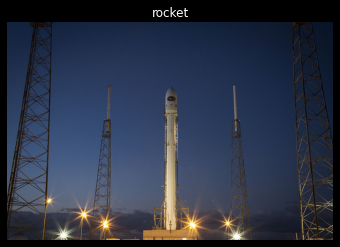

In [16]:
show_image(rocket_image, 'rocket')

In [19]:
from skimage import color
rocket_image_gray = color.rgb2gray(rocket_image)


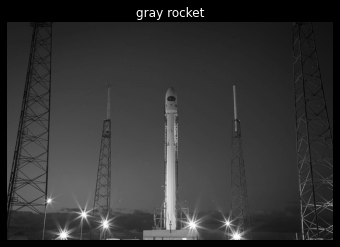

In [20]:
show_image(rocket_image_gray, 'gray rocket')